# Homework 5

1. Split the data into a 70-30 split for training and testing data.

In [1]:
#Importing needed packages
import netCDF4
from netCDF4 import Dataset 

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
#Reading in radar parameters
radar_data = pd.read_csv('/Users/troyzaremba/Desktop/radar_parameters.txt', index_col = 0)

In [3]:
#Building a training dataset
x_train, x_test, y_train ,y_test = train_test_split(radar_data.iloc[:, :-1], radar_data.iloc[:, -1], test_size=0.3)

2. Using the split created in (1), train a multiple linear regression dataset using the training dataset, and validate it using the testing dataset. Compare the r^2 and root mean square errors of model on the training and testing sets to a baseline prediction of rain rate using the formula Z = 200R^1.6.

r_squared: 0.9895754916946197
RMSE: 0.7969510530404946


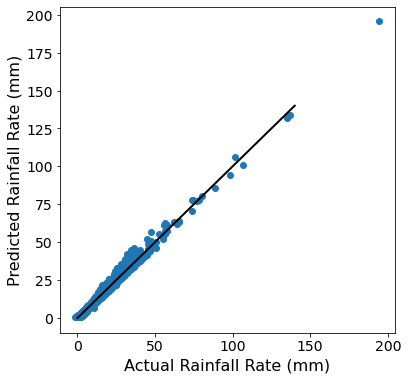

In [4]:
#simple linear regression model comparing actual rainfall rate and predicted rainfall rate using 
#the different radar paramters.  See that this does a fairly good job at predicting rainfall rate. 

from sklearn.linear_model import LinearRegression
clf = LinearRegression()

clf.fit(x_train,y_train)

print(f'r_squared: {clf.score(x_test,y_test)}')
print(f'RMSE: {mean_squared_error(clf.predict(x_test), y_test.values)}')

plt.figure(figsize = (6, 6))
plt.scatter(clf.predict(x_test), y_test.values)

plt.plot([0, 140], [0, 140], color = 'black', linewidth = 2)
plt.ylabel('Predicted Rainfall Rate (mm)', fontsize = 16)
plt.xlabel('Actual Rainfall Rate (mm)', fontsize = 16) 
plt.tick_params(labelsize = 14)
plt.show()

3. Repeat 1 doing a grid search over polynomial orders, using a grid search over orders 0-21, and use cross-validation of 7 folds. For the best polynomial model in terms of r^2, does it outperform the baseline and the linear regression model in terms of r^2 and root mean square error?

In [5]:
#Looping through all of the degree polynomials.  Stack Overflow suggested making a function that 
#calls make pipeline so that is what I ended up doing because I wanted to use the GridSearch CV Function
#made more sense to make it a for loop and do one degree at a time. That loses the functionality of 
#just doing .best_params but I wasn't sure how I could substitute my new polynomial degree into my function each 
#time because that had to be specified.  Just appended the results to a list so I could make a comparison plot.

r2_all = []
rmse_all = []

for j in range(21):
    i = np.arange(1, 22, 1)[j]
    print(i)

    param_grid = {'polynomialfeatures__degree': [i]}

    def PolynomialRegression(degree=i):
        """Short function that calls Polynomial Features function of SKLearn with a given degree order"""
        return make_pipeline(PolynomialFeatures(degree), LinearRegression())

    poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7, scoring='neg_mean_squared_error', n_jobs = 4) 
    poly_grid.fit(x_train,y_train)

    model = poly_grid.best_estimator_

    test_model = model.fit(x_train,y_train).predict(x_test)

    r2 = r2_score(y_test, test_model)
    rmse = (mean_squared_error(y_test, test_model))**0.5

    r2_all.append(r2)
    rmse_all.append(rmse)

1
2
3
4
5
6
7
8
9
10
11
12


KeyboardInterrupt: 

In [6]:
r2_all

[0.9895754916946197,
 0.9995773075735607,
 0.9999896395141726,
 0.9999851720330548,
 0.9999255878326712,
 0.999964385954462,
 0.9991789456971694,
 0.9973991354605496,
 0.9986438255947687,
 0.9778791152653059,
 0.9999206759062529]

4. Repeat 1 with a Random Forest Regressor, and perform a grid_search on the following parameters: 
    
    {'bootstrap': [True, False],  
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],  
    'max_features': ['auto', 'sqrt'],  
    'min_samples_leaf': [1, 2, 4],  
    'min_samples_split': [2, 5, 10],  
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
    
Can you beat the baseline, or the linear regression, or best polynomial model with the best optimized Random Forest Regressor in terms of r^2 and root mean square error?

In [ ]:
#Calling the randomized Search CV using the parameters above to see if I can beat the baseline linear regression

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid = {'bootstrap': [True, False],  
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],  
              'max_features': ['auto', 'sqrt'],  
              'min_samples_leaf': [1, 2, 4],  
              'min_samples_split': [2, 5, 10],  
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

grid = RandomizedSearchCV(RandomForestRegressor(), param_grid, n_iter=100,  n_jobs = 4)

grid.fit(x_train, y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
model = grid.best_estimator_

test_model = model.fit(x_train, y_train).predict(x_test)

R2 = r2_score(y_test, test_model)
RMSE = (mean_squared_error(y_test, test_model))**0.5

print(f'r-squared: {R2}')
print(f'RMSE: {RMSE}')